<a href="https://colab.research.google.com/github/kven30/portfolio/blob/main/Karthik__small_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd


In [ ]:
data = pd.read_csv('/content/parkinsons_updrs.data')
data

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [ ]:
data.dropna()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [ ]:
data = data.drop(columns=['motor_UPDRS'])

In [ ]:
input_cols=data.columns.tolist()
output_col = 'total_UPDRS'
input_cols.remove(output_col)
X_train, X_test, y_train, y_test = train_test_split(data[input_cols], data[output_col], test_size=0.8)

In [ ]:
#networ

prediction_layer = tf.keras.layers.Dense(units=1)
inputs1 = tf.keras.Input(shape=[len(input_cols)])
x = tf.keras.layers.Dense(32, activation='relu')(inputs1)
x= tf.keras.layers.Dense(32, activation='relu')(x)
tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs1 = prediction_layer(x)

#model
model = tf.keras.Model(inputs1, outputs1)

#optimizer
optimizer_1 = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_1 = tf.keras.losses.MeanSquaredError()
model.compile(optimizer=optimizer_1, loss=loss_1)

#test
nn_early_stopping_1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

nn_plateau_monitor_1= tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                           patience = 5, factor=0.1)




In [ ]:
nn_history_1 = model.fit(X_train, y_train, epochs=50,batch_size=200, validation_split=0.2, verbose=1,
                                  callbacks=[nn_early_stopping_1, nn_plateau_monitor_1])

Epoch 1/50
5/5 [==============================] - 1s 57ms/step - loss: 351.4050 - val_loss: 254.1549 - lr: 0.0010
Epoch 2/50
5/5 [==============================] - 0s 15ms/step - loss: 235.2979 - val_loss: 237.7147 - lr: 0.0010
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 201.4326 - val_loss: 192.3253 - lr: 0.0010
Epoch 4/50
5/5 [==============================] - 0s 16ms/step - loss: 166.2357 - val_loss: 156.3388 - lr: 0.0010
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 148.5190 - val_loss: 139.4925 - lr: 0.0010
Epoch 6/50
5/5 [==============================] - 0s 18ms/step - loss: 132.9753 - val_loss: 131.0210 - lr: 0.0010
Epoch 7/50
5/5 [==============================] - 0s 15ms/step - loss: 122.8324 - val_loss: 124.0003 - lr: 0.0010
Epoch 8/50
5/5 [==============================] - 0s 21ms/step - loss: 113.5659 - val_loss: 110.0735 - lr: 0.0010
Epoch 9/50
5/5 [==============================] - 0s 22ms/step - loss: 106.5240 - val_lo

147/147 [==============================] - 0s 2ms/step


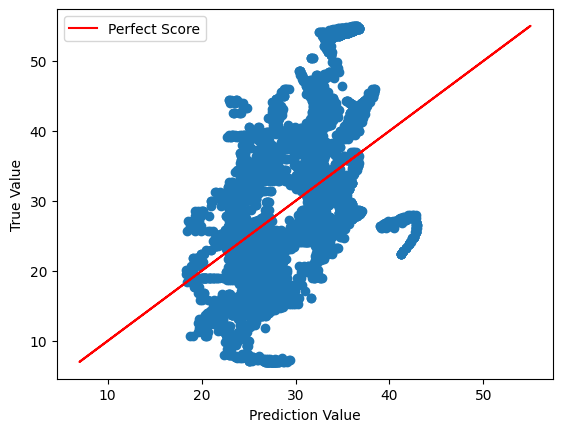

In [ ]:
predictions_1 = model.predict(X_test)
plt.figure()
plt.scatter(predictions_1, y_test)
plt.plot(y_test, y_test, c='r', label='Perfect Score')
plt.xlabel('Prediction Value')
plt.ylabel('True Value')
plt.legend()
plt.show()

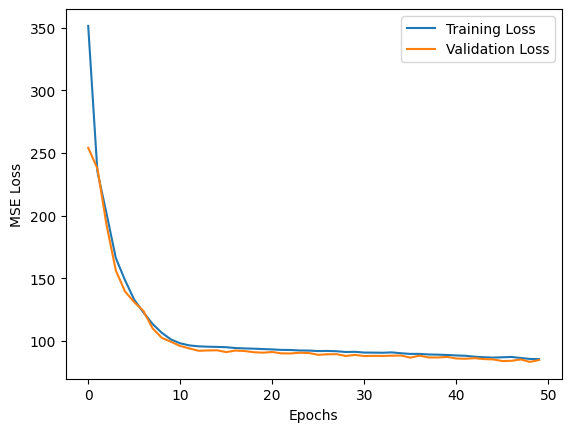

In [ ]:
plt.figure()
plt.plot(nn_history_1.history['loss'], label='Training Loss')
plt.plot(nn_history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
predictions=model.predict(X_test)
print(predictions)
model.evaluate(X_test,y_test)

147/147 [==============================] - 0s 2ms/step
[[26.364992]
 [30.624737]
 [24.070238]
 ...
 [31.75203 ]
 [33.83147 ]
 [28.896145]]
147/147 [==============================] - 0s 2ms/step - loss: 86.4520


86.45201873779297